In [ ]:
''' Real-One -> https://www.kaggle.com/code/suvroo/complete-nlp-pipeline#One-hot-encoding'''

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# 1. Text Preprocessing

In [ ]:
# 1.1 Lowercase

In [ ]:
df['review'][0].lower()

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

In [ ]:
df['review'] = df['review'].str.lower()
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [ ]:
# 1.2 remove html tags

In [ ]:
import re

pattern = re.compile('<.*?>')

def remove_html_tags(text):
  return pattern.sub('',text)

In [ ]:
remove_html_tags('<br /><br />the first thing')

'the first thing'

In [ ]:
df['review'] = df['review'].apply(remove_html_tags)
df.head()

In [ ]:
# 1.3 Remove URL's tags

In [ ]:
def remove_url(text):
    pattern=re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

text='Checkout this webpage to learn more about deep learning https://www.deeplearning.ai/ai-notes/initialization/index.html'
remove_url(text)

'Checkout this webpage to learn more about deep learning '

In [ ]:
# 1.4 Removing punchuation

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
exclude = string.punctuation
def remove_punc(text):
  for char in exclude:
    if char in text:
      text = text.replace(char,'')
  return text

text ="This..! text,& is ,,just@ filled# with %&punctuation"
remove_punc(text)

'This text is just filled with punctuation'

In [ ]:
#1.5 GENZ lingo treatment

In [ ]:
chat_word = {
    'AFAIK': 'As Far As I Know',
    'AFK': 'Away From Keyboard',
    'ASAP': 'As Soon As Possible',
    'ATK': 'At The Keyboard',
    'ATM': 'At The Moment',
    'A3': 'Anytime, Anywhere, Anyplace',
    'BAK': 'Back At Keyboard',
    'BBL': 'Be Back Later',
    'BBS': 'Be Back Soon',
    'BFN': 'Bye For Now',
    'B4N': 'Bye For Now',
    'BRB': 'Be Right Back',
    'BRT': 'Be Right There',
    'BTW': 'By The Way',
    'B4': 'Before',
    'CU': 'See You',
    'CUL8R': 'See You Later',
    'CYA': 'See You',
    'FAQ': 'Frequently Asked Questions',
    'FC': 'Fingers Crossed',
    'FWIW': "For What It's Worth",
    'FYI': 'For Your Information',
    'GAL': 'Get A Life',
    'GG': 'Good Game',
    'GN': 'Good Night',
    'GMTA': 'Great Minds Think Alike',
    'GR8': 'Great!',
    'G9': 'Genius',
    'IC': 'I See',
    'ICQ': 'I Seek you (also a chat program)',
    'ILU': 'ILU: I Love You',
    'IMHO': 'In My Honest/Humble Opinion',
    'IMO': 'In My Opinion',
    'IOW': 'In Other Words',
    'IRL': 'In Real Life',
    'KISS': 'Keep It Simple, Stupid',
    'LDR': 'Long Distance Relationship',
    'LMAO': 'Laugh My A.. Off',
    'LOL': 'Laughing Out Loud',
    'LTNS': 'Long Time No See',
    'L8R': 'Later',
    'MTE': 'My Thoughts Exactly',
    'M8': 'Mate',
    'NRN': 'No Reply Necessary',
    'OIC': 'Oh I See',
    'PITA': 'Pain In The A..',
    'PRT': 'Party',
    'PRW': 'Parents Are Watching',
    'QPSA?': 'Que Pasa?',
    'ROFL': 'Rolling On The Floor Laughing',
    'ROFLOL': 'Rolling On The Floor Laughing Out Loud',
    'ROTFLMAO': 'Rolling On The Floor Laughing My A.. Off',
    'SK8': 'Skate',
    'STATS': 'Your sex and age',
    'ASL': 'Age, Sex, Location',
    'THX': 'Thank You',
    'TTFN': 'Ta-Ta For Now!',
    'TTYL': 'Talk To You Later',
    'U': 'You',
    'U2': 'You Too',
    'U4E': 'Yours For Ever',
    'WB': 'Welcome Back',
    'WTF': 'What The F...',
    'WTG': 'Way To Go!',
    'WUF': 'Where Are You From?',
    'W8': 'Wait...',
    '7K': 'Sick:-D Laugher',
    'TFW': 'That feeling when',
    'MFW': 'My face when',
    'MRW': 'My reaction when',
    'IFYP': 'I feel your pain',
    'TNTL': 'Trying not to laugh',
    'JK': 'Just kidding',
    'IDC': "I don't care",
    'ILY': 'I love you',
    'IMU': 'I miss you',
    'ADIH': 'Another day in hell',
    'ZZZ': 'Sleeping, bored, tired',
    'WYWH': 'Wish you were here',
    'TIME': 'Tears in my eyes',
    'BAE': 'Before anyone else',
    'FIMH': 'Forever in my heart',
    'BSAAW': 'Big smile and a wink',
    'BWL': 'Bursting with laughter',
    'BFF': 'Best friends forever',
    'CSL': "Can't stop laughing"
}

In [ ]:
def short_conv(text):
  new_text = []
  for w in text.split():
    if w.upper() in chat_word:
      new_text.append(chat_word[w.upper()])
    else:
      new_text.append(w)
  return " ".join(new_text)

text = 'let me know ASAP'
short_conv(text)


'let me know As Soon As Possible'

In [ ]:
# 1.6 Spelling correction

In [ ]:
from textblob import TextBlob

text=" ceertainli I dont kniw what is wrrong herre"
textblb=TextBlob(text)
textblb.correct().string

' certainly I dont know what is wrong here'

In [ ]:
# 1.7 Removing StopWords

In [ ]:
import nltk
nltk.download('all')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def remove_stopwords(text):
  new_text = []
  for w in text.split():
    if w in stopwords.words('english'):
      new_text.append('')
    else:
      new_text.append(w)

  x=new_text[:]
  new_text.clear()
  return " ".join(x)


text="I wasn't sure that this might happened"
remove_stopwords(text)

'I  sure   might happened'

In [ ]:
# 1.8 Handling emoji's

In [ ]:
# Removing
import re
def remove_emoji(text):
    emoji_pattern=re.compile("["
                             u"\U0001F600-\U0001F64F" #emoticons
                             u"\U0001F300-\U0001F5FF" #symbols, pictograph
                              u"\U0001F680-\U0001F6FF" #transport and map symbol
                              u"\U0001F1E0-\U0001F1FF" # flags(IOS)
                              u"\U00002702-\U000027B0"
                              u"\U00002FC2-\U0001F251"
                             "]+",flags=re.UNICODE)
    return emoji_pattern.sub(r'',text)

text="that is not so funny please stop 😭"
remove_emoji(text)

'that is not so funny please stop '

In [ ]:
! pip install emoji

In [ ]:
# Replace
import emoji
print(emoji.demojize(text))

that is not so funny please stop :loudly_crying_face:


# 2. Tokenization

In [ ]:
# Tokenization

In [ ]:
sent1="I am going to delhi"
sent2='I have a Ph.D in M.L'
sent3="We're here to help! mail us at xuz@gmail.com"

In [ ]:
# 2.1 NLTK

In [ ]:
from nltk.tokenize import word_tokenize
word_tokenize(sent1)

['I', 'am', ',', 'going', 'to', 'delhi']

In [ ]:
# fails at this sentence as it seperated email id on the basics of @
word_tokenize(sent3)

['We',
 "'re",
 'here',
 'to',
 'help',
 '!',
 'mail',
 'us',
 'at',
 'xuz',
 '@',
 'gmail.com']

In [ ]:
# 2.1 space

In [ ]:
#spacy
import spacy
nlp=spacy.load('en_core_web_sm')

doc1=nlp(sent1)
doc2=nlp(sent2)
doc3=nlp(sent3)

for token in doc2:
    print(token)# this will be in object to convert use token.text

I
have
a
Ph
.
D
in
M.L


# 3. Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer

ps=PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

sample="Walk walking walked walks"
stem_words(sample)

# sometimes root word is not even english word sometimes

'walk walk walk walk'

In [ ]:
sample2='Stemming is a text preprocessing technique in NLP that reduces words to their root or base form by removing suffixes. Unlike lemmatization, which relies on linguistic rules, stemming uses heuristic methods to strip affixes. For example, "running," "runner," and "ran" might all be reduced to "run." Common algorithms include the Porter Stemmer, which applies a series of rules to iteratively strip suffixes, and the Snowball Stemmer, which is an improved version of the Porter Stemmer. While stemming is faster and simpler than lemmatization, it can be less accurate, sometimes producing stems that are not actual words.'
stem_words(sample2)

'stem is a text preprocess techniqu in nlp that reduc word to their root or base form by remov suffixes. unlik lemmatization, which reli on linguist rules, stem use heurist method to strip affixes. for example, "running," "runner," and "ran" might all be reduc to "run." common algorithm includ the porter stemmer, which appli a seri of rule to iter strip suffixes, and the snowbal stemmer, which is an improv version of the porter stemmer. while stem is faster and simpler than lemmatization, it can be less accurate, sometim produc stem that are not actual words.'

In [ ]:
# You can already see the disadvantage of using stemming as some words are not even english words so we should use stemming when we dont need to show the output to anyone, if we need to the we should go for lemmatization

# 4. Lemmatization

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

sentence = "The children were playing in the park, running and laughing as they enjoyed their freedom, unaware of the time passing quickly by."
doc = nlp(sentence)

print("Original Word - Lemmatized Word")
for token in doc:
    print(f"{token.text} - {token.lemma_}")

Original Word - Lemmatized Word
The - the
children - child
were - be
playing - play
in - in
the - the
park - park
, - ,
running - run
and - and
laughing - laugh
as - as
they - they
enjoyed - enjoy
their - their
freedom - freedom
, - ,
unaware - unaware
of - of
the - the
time - time
passing - pass
quickly - quickly
by - by
. - .


# 5. one hot encoding

One-hot encoding is a technique used to convert categorical data into a numerical format

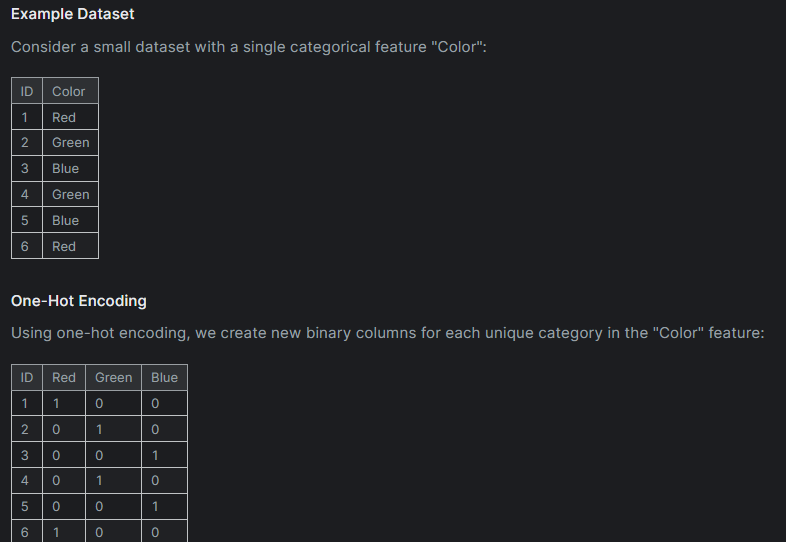

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

data = {
    'ID': [1, 2, 3, 4, 5],
    'Color': ['Red', 'Green', 'Blue', 'Green', 'Blue']
}

df = pd.DataFrame(data)

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['Color']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Color']))
final_df = pd.concat([df, encoded_df], axis=1)

print("Original DataFrame:")
print(df)
print("\nOne-Hot Encoded DataFrame:")
print(final_df)

Original DataFrame:
   ID  Color
0   1    Red
1   2  Green
2   3   Blue
3   4  Green
4   5   Blue

One-Hot Encoded DataFrame:
   ID  Color  Color_Blue  Color_Green  Color_Red
0   1    Red         0.0          0.0        1.0
1   2  Green         0.0          1.0        0.0
2   3   Blue         1.0          0.0        0.0
3   4  Green         0.0          1.0        0.0
4   5   Blue         1.0          0.0        0.0


# 6. Bag of words

- The core intuition behind the Bag of Words (BoW) model is that if our algorithm detects similar words occurring with similar frequencies, it will classify the documents as being in the same class. Here, the order of words and context do not matter; what matters is the presence and frequency of words.

- In BoW, each word is represented as a coordinate in an n-dimensional space. If we set the binary parameter to True, any word that appears more than once is still treated as if it appears only once. Consequently, the coordinates will be binary, filled only with 0s and 1s.

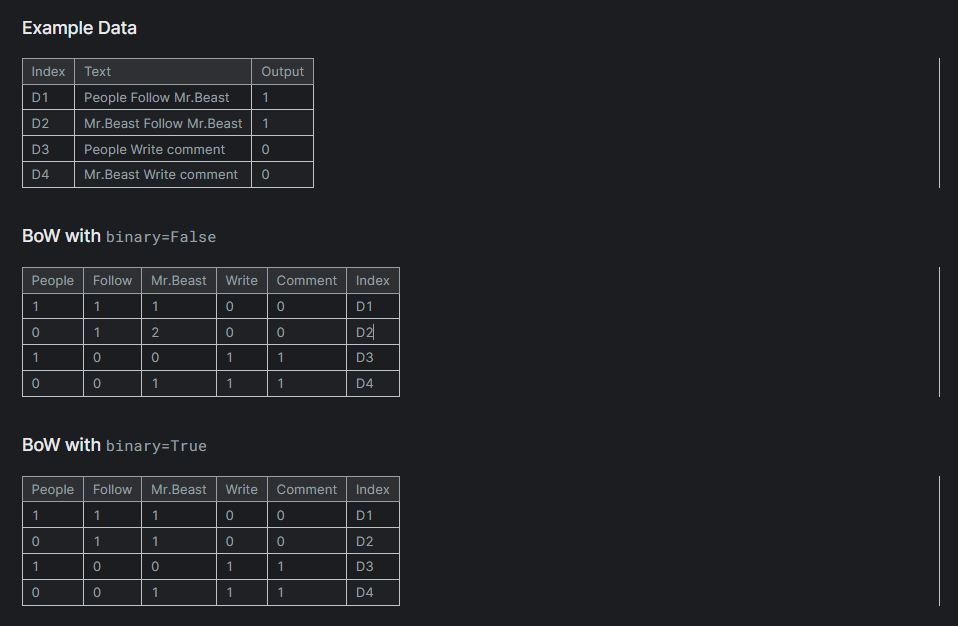

**Filtering Rare Words**
- To remove rare words, you can use the max_features parameter, which limits the vocabulary to the most frequent words. For instance, setting max_features=1/2 ignores all words with frequencies less than this threshold.

**Advantages of Bag of Words**
- Simplicity and Intuitiveness: Easy to implement and understand.
- Out-of-Vocabulary (OOV) Issue Mitigation: Since the model uses a fixed vocabulary, it avoids the OOV issue that plagues one-hot encoding.

**Disadvantages of Bag of Words**
- Sparsity: With a large vocabulary, the representation will have many 0s, potentially leading to overfitting.
- Information Loss: Ignores word order and context, leading to loss of semantic meaning.
- Example: "This is a very good movie" and "This is not a very good movie" might be represented similarly, which can cause issues with cosine similarity.
Cosine Similarity
Cosine similarity measures the cosine of the angle between two vectors, providing a metric for their similarity. The formula is:

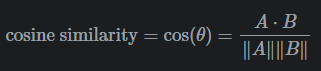

- Using cosine similarity, "This is a very good movie" and "This is not a very good movie" might appear similar due to the close angle between their vector representations in the BoW model.

- By using BoW, you can quickly and efficiently convert text data into numerical features for machine learning algorithms. However, be aware of its limitations and consider more advanced techniques like TF-IDF, word embeddings, or language models for capturing more nuanced textual information.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Define the dataset
data = {
    'Index': ['D1', 'D2', 'D3', 'D4'],
    'Text': [
        'People Follow Mr.Beast',
        'Mr.Beast Follow Mr.Beast',
        'People Write comment',
        'Mr.Beast Write comment'
    ],
    'Output': [1, 1, 0, 0]
}

# Create a DataFrame
df = pd.DataFrame(data)
df

,Index,Text,Output
0,D1,People Follow Mr.Beast,1
1,D2,Mr.Beast Follow Mr.Beast,1
2,D3,People Write comment,0
3,D4,Mr.Beast Write comment,0


In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Text'])

vocab = vectorizer.get_feature_names_out()
print(vocab)

['beast' 'comment' 'follow' 'mr' 'people' 'write']


In [ ]:
print(vectorizer.vocabulary_)

{'people': 4, 'follow': 2, 'mr': 3, 'beast': 0, 'write': 5, 'comment': 1}


In [ ]:
bow_df = pd.DataFrame(X.toarray(), columns=vocab)

final_df = pd.concat([df[['Index', 'Output']], bow_df], axis=1)

print("Original DataFrame:")
print(df)
print("\nBag of Words DataFrame with binary parameter as False:")
print(final_df)

Original DataFrame:
  Index                      Text  Output
0    D1    People Follow Mr.Beast       1
1    D2  Mr.Beast Follow Mr.Beast       1
2    D3      People Write comment       0
3    D4    Mr.Beast Write comment       0

Bag of Words DataFrame with binary parameter as False:
  Index  Output  beast  comment  follow  mr  people  write
0    D1       1      1        0       1   1       1      0
1    D2       1      2        0       1   2       0      0
2    D3       0      0        1       0   0       1      1
3    D4       0      1        1       0   1       0      1


# 7. N-Gram

N-grams are an extension of the Bag of Words (BoW) model, where instead of considering single words, we also include sequences of n consecutive words from the text. This approach captures more contextual information than BoW by preserving some degree of word order.

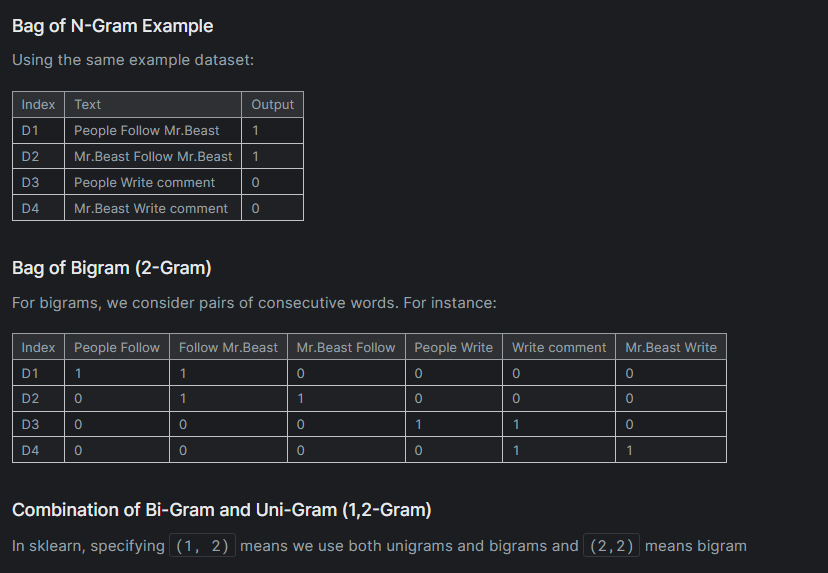

**Advantages of N-Gram Models**

- Capturing Semantic Meaning: Unlike BoW, which may treat "very good movie" and "not a very good movie" similarly, N-grams can capture some semantic differences due to word sequences.

- Contextual Information: Preserves some order of words, providing more context to the model.

**Disadvantages of N-Gram Models**
- Out-of-Vocabulary Words: Similar to BoW, N-gram models suffer from the issue of out-of-vocabulary words if the vocabulary is not predefined.

**Conclusion**

N-gram models enhance the BoW approach by considering sequences of words, thereby capturing more context and improving the model's ability to understand the semantics of text. They are widely used in tasks such as language modeling, sentiment analysis, and machine translation to extract more meaningful features from text data. However, like BoW, they have limitations in handling rare or out-of-vocabulary words.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

data ={
    'Index' :['D1','D2','D3','D4'],
    'Text' :[
        'People Follow Mr.Beast',
        'Mr.Beast Follow Mr.Beast',
        'People Write comment',
        'Mr.Beast Write comment'],
    'output' :[1,1,0,0]
}
df = pd.DataFrame(data)
texts = df['Text']
labels = df['output']


In [ ]:
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))  # Adjust ngram_range for different n-gram sizes
X_ngram = ngram_vectorizer.fit_transform(texts)
feature_names = ngram_vectorizer.get_feature_names_out()
df_ngram = pd.DataFrame(X_ngram.toarray(), columns=feature_names)
df_final = pd.concat([df[['Index', 'output']], df_ngram], axis=1)

print("Final DataFrame with uni-bi-gram:")
df_final

Final DataFrame with uni-bi-gram:


,Index,output,beast,beast follow,beast write,comment,follow,follow mr,mr,mr beast,people,people follow,people write,write,write comment
0,D1,1,1,0,0,0,1,1,1,1,1,1,0,0,0
1,D2,1,2,1,0,0,1,1,2,2,0,0,0,0,0
2,D3,0,0,0,0,1,0,0,0,0,1,0,1,1,1
3,D4,0,1,0,1,1,0,0,1,1,0,0,0,1,1


# 8. TD-IDF

TF-IDF addresses the limitation of equal weighting of terms in Bag of Words by giving higher weights to terms that are rare in the corpus but frequent in a particular document. This approach is crucial in capturing the importance of terms in documents for tasks like information retrieval and text mining.

**Term Frequency (TF)**

Term Frequency (TF) measures how frequently a term appears in a document relative to the total number of terms in that document. It is computed as:

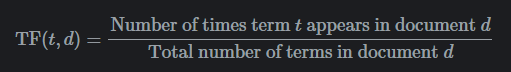

Example:

Consider a document: "The cat sat on the mat."

Term Frequency for each term:

TF("the") = 2/6 = 1/3

TF("cat") = 1/6

TF("sat") = 1/6

TF("on") = 1/6

TF("mat") = 1/6

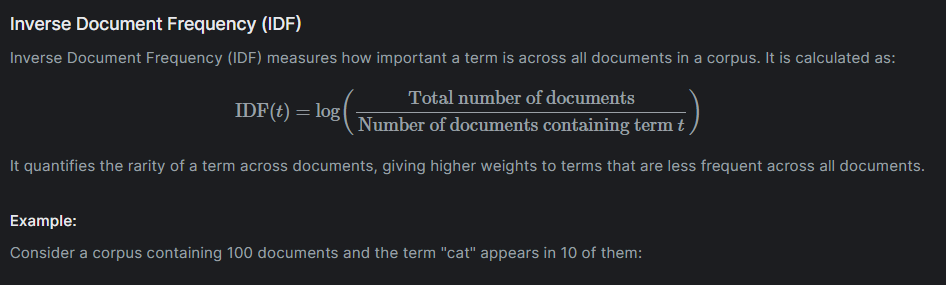

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

data = {
    'Index': ['D1', 'D2', 'D3', 'D4'],
    'Text': [
        'People Follow Mr.Beast',
        'Mr.Beast Follow Mr.Beast',
        'People Write comment',
        'Mr.Beast Write comment'
    ],
    'Output': [1, 1, 0, 0]
}

df = pd.DataFrame(data)
texts = df['Text']
labels = df['Output']

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

X_tfidf = tfidf_vectorizer.fit_transform(texts)

feature_names = tfidf_vectorizer.get_feature_names_out()

df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)
df_final = pd.concat([df[['Index', 'Output']], df_tfidf], axis=1)

print("Final DataFrame with TF-IDF:")
df_final

Final DataFrame with TF-IDF:


,Index,Output,beast,comment,follow,mr,people,write
0,D1,1,0.444931,0.000000,0.549578,0.444931,0.549578,0.000000
1,D2,1,0.648009,0.000000,0.400210,0.648009,0.000000,0.000000
2,D3,0,0.000000,0.577350,0.000000,0.000000,0.577350,0.577350
3,D4,0,0.444931,0.549578,0.000000,0.444931,0.000000,0.549578


# 9. Training and prediction using ML models

In [ ]:
import numpy as np
import pandas as pd
temp_df = pd.read_csv('/content/IMDB Dataset.csv')
df = temp_df.iloc[:15000]
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.duplicated().sum()

39

In [ ]:
df.drop_duplicates(inplace=True)

<ipython-input-102-16cdb8520be8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [ ]:
import re
from nltk.corpus import stopwords
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text
df['review'] = df['review'].apply(remove_tags)

sw_list = stopwords.words('english')
df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

df['review'] = df['review'].apply(lambda x:x.lower())

<ipython-input-103-e7d4a621d36d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(remove_tags)
<ipython-input-103-e7d4a621d36d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))
<ipython-input-103-e7d4a621d36d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [ ]:
X = df.iloc[:,0:1]
y = df['sentiment']

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
X_train.shape

In [ ]:
# Applying BoW
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_bow = cv.fit_transform(X_train['review']).toarray()
X_test_bow = cv.transform(X_test['review']).toarray()

X_train_bow.shape

# Model with GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train_bow,y_train)

In [ ]:
y_pred = gnb.predict(X_test_bow)

from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

In [ ]:
confusion_matrix(y_test,y_pred)